# Objective: Find relationship beween Aerosols and dataset

In [ ]:
import pandas as pd

DATA_FILEPATH = "../A_data/climate.csv"

dataset = pd.read_csv(DATA_FILEPATH)
data_size = dataset.shape
# print(f"The Dataset has a size of {data_size[0]} rows and {data_size[1]} columns/features, containing {data_size[0]*data_size[1]} entries.")
# should return 'The Dataset has a size of 308 rows and 11 columns/features, containing 3388 entries.'

global_isnull = dataset.isna() == True
rows_with_missing_values = dataset[global_isnull.any(axis=1)]
# axis=1 for returning rows, axis=0 for columns
#print(rows_with_missing_values)

##### FIXED TIME #####
month_save = dataset.copy() # toggle to test month filler
check_isna = month_save.isna() == True
check_rows_with_missing_values = month_save[check_isna.any(axis=1)]

for current_index,row in check_rows_with_missing_values.iterrows():
    #get previous index's year and month
    previous_index = current_index - 1
    prev_month = month_save.loc[previous_index, 'Month']
    current_month = (prev_month + 1) if (prev_month <= 12) else 1.0
    month_save.iloc[current_index, month_save.columns.get_loc('Month')] = current_month

dataset_fixed_months = month_save[check_isna.any(axis=1)]
print(dataset_fixed_months)


Fix aerosol category

In [ ]:
A_save = dataset.copy() # toggle to test aerosol filler

show_Low_only = A_save['Aerosols'] == 'L'
show_Mid_only = A_save['Aerosols'] == 'M'
show_high_only = A_save['Aerosols'] == 'H'

#get lower threshold of CFCs for samples categorized as high

high_only = A_save[show_high_only]
low_only = A_save[show_Low_only]
mid_only = A_save[show_Mid_only]

boxplotting = A_save[['Aerosols','CFC-11']]

In [ ]:
# percentage comp of aerosols
A_save['cfcmix'] = (A_save['CFC-11'] + A_save['CFC-12']) / (A_save['CO2']/100+A_save['CH4']/1000)

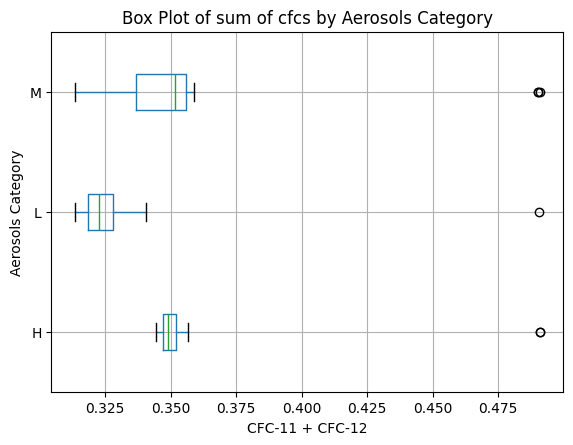

In [ ]:
import matplotlib.pyplot as plt
A_save['cfcmix'] = (A_save['CFC-11']) / (A_save['CFC-11'] + A_save['CFC-12']) 
# Create a horizontal box plot for CFC-11 categorized by Aerosols
A_save.boxplot(column='cfcmix', by='Aerosols', vert=False)
plt.title('Box Plot of sum of cfcs by Aerosols Category')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('CFC-11 + CFC-12')
plt.ylabel('Aerosols Category')
plt.show()

range of xlo is -0.0001429094038543485	-0.002226096733004215
range of xmd is -0.00013177997033348657	-0.0022279758220050626
range of xhi is -0.0001314266221909212	-0.002462523029034068


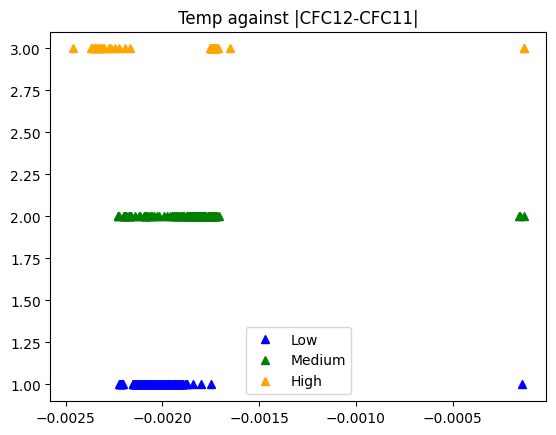

<Figure size 640x480 with 0 Axes>

In [ ]:
# fuck it we graph
import matplotlib.pyplot as plt

ylow = np.full(low_only.shape[0],1)
xl11 = low_only["CFC-11"] < 200
xl12 = low_only["CFC-12"]
xlcomp =  np.power(low_only["CFC-12"],-1) - np.power(low_only['CFC-11'],-1)
xmcomp =  np.power(mid_only["CFC-12"],-1) - np.power(mid_only["CFC-11"],-1)
xhcomp = np.power(high_only["CFC-12"],-1) - np.power(high_only["CFC-11"],-1)
    
#ymid = mid_only["Temp"]
ymid = np.full(mid_only.shape[0],2)
xm11 = mid_only["CFC-11"]
xm12 = mid_only["CFC-12"]
#xmid12 = mid_only["NO2"]

yhigh = np.full(high_only.shape[0],3)
xh11 = high_only["CFC-11"]
xh12 = high_only["CFC-12"]

print(f"range of xlo is {max(xlcomp)}\t{min(xlcomp)}")
print(f"range of xmd is {max(xmcomp)}\t{min(xmcomp)}")
print(f"range of xhi is {max(xhcomp)}\t{min(xhcomp)}")

fig,ax = plt.subplots()


lo_mix_line, = ax.plot( xlcomp, ylow,"b^",label = "Low")
md_mix_line, = ax.plot( xmcomp, ymid,"g^",label = "Medium")
hi_mix_line, = ax.plot( xhcomp, yhigh,"^",color = "orange",label = "High")

#lo_mix_line, = ax.plot( xlcomp, ylow,"b^",label = "Low")
#md_mix_line, = ax.plot( xmcomp, ymid,"g^",label = "Medium")
#hi_mix_line, = ax.plot(xhcomp, yhigh,"^",color = "orange",label = "High")

plt.title("Temp against |CFC12-CFC11|")
first_legend = ax.legend(handles=[lo_mix_line,md_mix_line,hi_mix_line], loc='best')
plt.show()

plt.savefig(r"C:\Users\ChunChunMaru\Desktop\CS105_STAT_BROK\Project\clim_vis\Clim_V1.png")

Tried:
- basic operations (+ - * /)
- log, exp
- harmonic mean
- composition relative to other gases


### Stuff to try:
Logistic Regression<br>
Decision Trees or Random Forests, Gradient Boosting (with XGBoost)<br>
SVMs (if bo pian, good ol' NNs)<br>
<br>
PCA, t-SNE or UMAP

<u>Association Rule Mining: "If feature X is high and feature Y is low, then the label is likely Category A."</u><br>
<u>Apriori Algorithm</u>: To find frequent itemsets and rules.<br>
<u>FP-Growth</u>: A more efficient alternative to Apriori.<br>
<ul>
<li>ANOVA
<li>Chi-Square Test
<li>Correlation Analysis
<li>Correlation Matrix
<li>SHAP (SHapley Additive exPlanations): To explain individual predictions.
<li>LIME (Local Interpretable Model-agnostic Explanations): To approximate the model locally.
</ul>

<div>

Visualise Outliers with graph

In [ ]:
# general function to check for outliers using graphs
def outlier_finder(Dataframe, target_col):
    #plt.figure(figsize=(10, 10))
    cols = list(Dataframe.select_dtypes(include=['float64']))
    
    excluded_cols = {'Month'}

    plottable_columns = list(set(cols) - excluded_cols- {target_col})
    print(plottable_columns)
    
    longest_colname = max(plottable_columns, key=len)
    
    #fig, axes = plt.subplots(num_float64_columns,1, sharex=True, sharey=True, layout="constrained")
    fig, axes = plt.subplots(1,len(plottable_columns),figsize = (len(plottable_columns) * 6, 4))
    #plt.figure(figsize=(200, 250))
    
    print(target_col, f"for x-axis: {" "*(len(longest_colname) - len(target_col))}\t", 'min ',Dataframe[target_col].min(),'\tmax ', Dataframe[target_col].max())
    
    for i in range(len(plottable_columns)):
        
        column_name = plottable_columns[i]
        if column_name not in excluded_cols and not column_name==target_col:
            print(column_name, 'at index',i, f"{" "*(len(longest_colname) - len(column_name))}\tmin ", Dataframe[column_name].min(), '\tmax ' ,Dataframe[column_name].max())   
            
            # for line plot to properly view trend
            #dataset_full_clean[column_name].plot(ax=axes[i],kind='line')
            
            # for following prescribed means for cleaning
            Dataframe[column_name].plot(y=target_col, ax=axes[i])
            
            axes[i].set_title(f"{target_col} against {column_name}")

    plt.show()

In [ ]:
#outlier_finder(dataset_full_clean, 'CFC-11')
#outlier_finder(dataset_full_clean, 'CFC-12')
#outlier_finder(dataset_full_clean, 'MEI')
#outlier_finderv2(dataset_full_clean, 'CFC-11')
#outlier_finderv2(dataset_full_clean, 'CFC-12')
#outlier_finderv2(dataset_full_clean, 'MEI')
dataset_full_clean.describe()

print(dataset_full_clean[dataset_full_clean['Month']==13])

Visual analysis that `CFC-11` data to check for outliers

In [ ]:
# plot for proof that there are 2 distinct columns for CFC 12 and 11
fig2, axes2 = plt.subplots(3,1, figsize = (10,10))

dataset_full_clean['Temp'].plot(x='CFC-11',ax=axes2[0] ,kind='line')
axes2[0].set_title('CFC-11 against temp')

dataset_full_clean['Temp'].plot(x='CFC-12',ax=axes2[1] ,kind='line')
axes2[1].set_title('CFC-12 against temp')

dataset_full_clean['Temp'].plot(y='MEI',ax=axes2[2] ,kind='line')
axes2[2].set_title('MEI against temp')
fig2.show()



visual exploration of trends with MEI and various numerical columns

In [ ]:
num_float64_columns = dataset.select_dtypes(include=['float64']).shape[1]
print(num_float64_columns)
cols2 = list(dataset.columns)

#CHANGE HERE
excluded_cols_FOR_MEI = {'Month','Year','N2O','Aerosols','TSI','MEI'}

plottable_columns = list(set(cols2) - excluded_cols_FOR_MEI)
print(plottable_columns)
#fig, axes = plt.subplots(num_float64_columns,1, sharex=True, sharey=True, layout="constrained")
fig, axes = plt.subplots(1,len(plottable_columns),figsize = (len(plottable_columns) * 6,len(plottable_columns) * 6))
#plt.figure(figsize=(200, 250))
for i in range(len(plottable_columns)):
    
    column_name = plottable_columns[i]
    if column_name not in excluded_cols:
        # for line plot to properly view trend
        #dataset_full_clean[column_name].plot(ax=axes[i],kind='line')
        
        # for following prescribed means for cleaning
        dataset_full_clean[column_name].plot(ax=axes[i],kind='box')
        
        axes[i].set_title(column_name)

plt.show()